In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [37]:
dataset = pd.read_csv("Churn_Modelling.csv")

In [38]:
dataset


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [39]:
X = dataset.iloc[:,3:13] # inside the iloc it represents [rows , columns]
Y = dataset.iloc[:,13]
# X is independent and Y is dependent

In [40]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [41]:
geography = pd.get_dummies(X['Geography'],drop_first=True) # drop first is used to remove one column
gender = pd.get_dummies(X['Gender'],drop_first=True) # here basically it creates two columns containg binary digits such as in gender it will
# create two columns namely male and female and we only require one column so it remove the first column

In [42]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [43]:
X = pd.concat([X,geography,gender],axis = 1)

In [44]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


In [45]:
# dropping unnecessary column
X = X.drop(['Geography','Gender'],axis=1)

In [46]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [47]:
#splitting the dataset into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, Y, test_size=0.20, random_state=0)

In [48]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [49]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [50]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [51]:
# here both the train and test dataset got converted to floating


In [52]:
# starting with ann


In [53]:
!pip install --upgrade keras
!pip install --upgrade tensorflow


In [54]:
import keras
import tensorflow

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


In [56]:
classifier = Sequential()

In [57]:
#adding input layer and first hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=11))

In [58]:
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))

In [59]:
#adding output layer
classifier.add(Dense(units = 1 , kernel_initializer = 'glorot_uniform' , activation = 'sigmoid' ))

In [60]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 72        
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
#compiling the ANN
classifier.compile(optimizer = "Adam", loss = 'binary_crossentropy', metrics = ['accuracy'])

In [62]:
#Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)


Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.5207 - accuracy: 0.7632 - val_loss: 0.4748 - val_accuracy: 0.7952
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4662 - accuracy: 0.7959 - val_loss: 0.4540 - val_accuracy: 0.7959
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4486 - accuracy: 0.7957 - val_loss: 0.4450 - val_accuracy: 0.7959
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4403 - accuracy: 0.7964 - val_loss: 0.4397 - val_accuracy: 0.7967
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4350 - accuracy: 0.7974 - val_loss: 0.4373 - val_accuracy: 0.7963
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4316 - accuracy: 0.7974 - val_loss: 0.4354 - val_accuracy: 0.7963
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4287 - accuracy: 0.7974 - val_loss: 0.4330 - val_accuracy: 0.7959

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


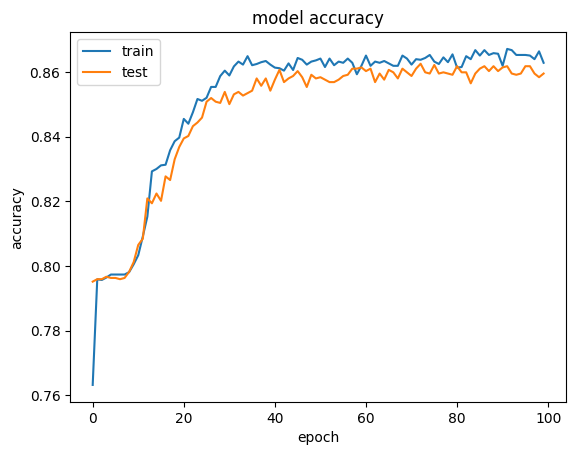

In [64]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
